<a href="https://colab.research.google.com/github/anisfreelancer71/kapal_titanic/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Simple Dataset

In [8]:
import pandas as pd

pizza = {'diameter':[6, 8, 10, 14, 18],
         'harga' :[7, 9, 13, 17.5, 18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


#Visualisasi data

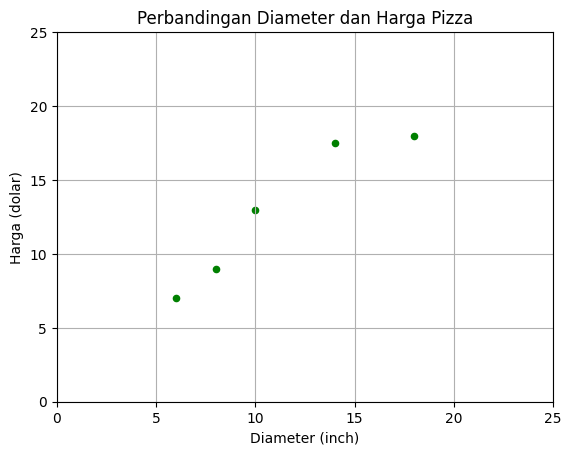

In [12]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga', color='g')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dolar)')

plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()


##Penyesuaian Dataset

In [13]:
import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'X: {X}')
print(f'y: {y}')

X: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [16]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [17]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

##Training Simple Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

##Visualisasi Simple Linear Regression Model

In [22]:
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

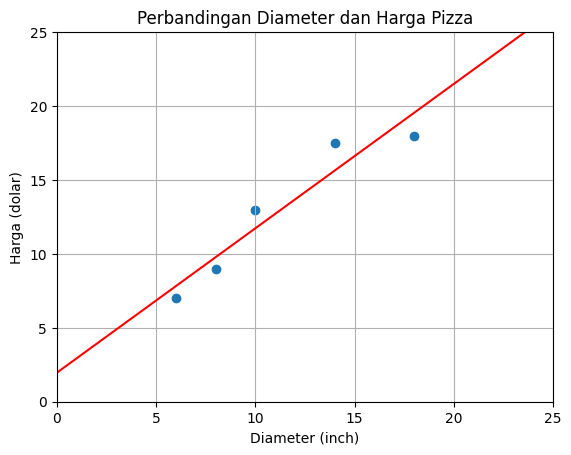

In [24]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dolar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

##Frmula Linear Regression: y = (alpha) + (betha)X

###1. y: response variable
###2. explanatory variable
###3. A : intercept
###4. B : slope

In [26]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')


intercept: 1.965517241379315
slope: [0.9762931]


##Mencari nilai Slope
Nilai slpoe pada linear Regression bisa diperoleh dengan memanfaatkan formula berikut B=cov(X,y)/var(X)

In [34]:
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten: [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 18. ]


##Variance

In [35]:
variance_x = np.var(X.flatten(), ddof=1)
print(f'variance: {variance_x}')

variance: 23.2


##Covariance

In [36]:
np.cov(X.flatten(), y)


array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [38]:
covariance_xy = np.cov(X.flatten(), y)[0][1]
print(f'covariance: {covariance_xy}')

covariance: 22.650000000000002


##Slope

In [42]:
slope = covariance_xy / variance_x
print(f'slope: {slpoe}')

slope: 0.976293103448276


##Mencari Nilai Intercept

Nilai intercept pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut :
a = y -Bx

In [43]:
intercept = np.mean(y) - slope * np.mean(X)
print(f'intercept: {intercept}')

intercept: 1.9655172413793096


##Prediksi Harga Pizza

In [46]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [47]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [48]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'Diameter: {dmtr} prediksi harga {hrg}')

Diameter: [12] prediksi harga 13.681034482758621
Diameter: [20] prediksi harga 21.491379310344826
Diameter: [23] prediksi harga 24.42025862068965


#Evaluasi Simple Linear Regression Model

##Training & Testing Dataset


In [49]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

##Training Simple Linear Regression Model

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##Evaluasi Linear Regression Model dengan Coeficient of Determination atau R-squard (R^2)

In [52]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


##Mencari nilai R-squared (R^2)


##SSres

In [53]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1,1))[0])**2
              for x_i, y_i in zip(X_test, y_test)])
print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


##SStot

In [54]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])
print(f' ss_tot: {ss_tot}')

 ss_tot: 56.8


#R^2


In [55]:
r_squared = 1- (ss_res / ss_tot)
print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553
